### Importing Libraries

In [ ]:
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
import numpy as np

### Download and save data

In [ ]:
# url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# dataset = tf.keras.utils.get_file("aclImdb_v1", url,untar=True, cache_dir='.',cache_subdir='')

#dataset_dir = os.path.join(os.path.dirname("aclImdb_v1"), 'aclImdb')

In [ ]:
dataset_dir = os.path.join(os.path.dirname("aclImdb_v1"), 'aclImdb')

In [ ]:
dataset_dir

'aclImdb'

In [ ]:
os.getcwd()

'C:\\Users\\paris\\Desktop\\Studies\\skillSlash\\Deep Learning'

In [ ]:
#what have we downloaded
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [ ]:
#current working directory
#dataset_dir

#### Files in the train directory

In [ ]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

#### Open a sample file

In [ ]:
os.path.join(train_dir, 'pos/0_9.txt')

sample_file =os.path.join(train_dir, 'pos/0_9.txt')
with open(sample_file) as f:
    print(f.read())

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [ ]:
sample_file =os.path.join(train_dir, 'pos/0_9.txt')
with open(sample_file) as f:
    print(f.read())

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [ ]:
batch_size = 32 #32 samples per iteration
seed = 42

In [ ]:
#dataset object
raw_train_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


There are 25,000 examples in the training folder, of which you will use 80% (or 20,000) for training. You can also iterate over the dataset and print out a few examples as follows.

In [ ]:
#the take(1) method takes 1 batch from the dataset
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print("Review", text_batch.numpy()[i])
        #When you use .numpy() on a TensorFlow tensor, you are converting the tensor to a NumPy array
        print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

#### Checking what is a positive review and what is negaive

In [ ]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


#### Creating a validation dataset

In [ ]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


#### Creating our test dataset

In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


#### Prreparing the data for training

In [ ]:
#reading data
sample_file = os.path.join(train_dir, 'pos/3_10.txt')
t=open(sample_file)
a=t.read()

In [ ]:
a

'"All the world\'s a stage and its people actors in it"--or something like that. Who the hell said that theatre stopped at the orchestra pit--or even at the theatre door? Why is not the audience participants in the theatrical experience, including the story itself?<br /><br />This film was a grand experiment that said: "Hey! the story is you and it needs more than your attention, it needs your active participation". "Sometimes we bring the story to you, sometimes you have to go to the story."<br /><br />Alas no one listened, but that does not mean it should not have been said.'

In [ ]:
#making all data lowercase
lowercase = tf.strings.lower(a)

In [ ]:
lowercase

<tf.Tensor: shape=(), dtype=string, numpy=b'"all the world\'s a stage and its people actors in it"--or something like that. who the hell said that theatre stopped at the orchestra pit--or even at the theatre door? why is not the audience participants in the theatrical experience, including the story itself?<br /><br />this film was a grand experiment that said: "hey! the story is you and it needs more than your attention, it needs your active participation". "sometimes we bring the story to you, sometimes you have to go to the story."<br /><br />alas no one listened, but that does not mean it should not have been said.'>

In [ ]:
stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')

In [ ]:
stripped_html

<tf.Tensor: shape=(), dtype=string, numpy=b'"all the world\'s a stage and its people actors in it"--or something like that. who the hell said that theatre stopped at the orchestra pit--or even at the theatre door? why is not the audience participants in the theatrical experience, including the story itself?  this film was a grand experiment that said: "hey! the story is you and it needs more than your attention, it needs your active participation". "sometimes we bring the story to you, sometimes you have to go to the story."  alas no one listened, but that does not mean it should not have been said.'>

In [ ]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,'[%s]' % re.escape(string.punctuation),'')

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
# a function to see how the above vectorization is happening
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [ ]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Belmondo is a tough cop. He goes after a big-time drug dealer (played by Henry Silva, normally a great villain - see "Sharky\'s Machine"; but here he is clearly dubbed, and because of that he lacks his usual charisma). He goes to the scuzziest places of Paris and Marseilles, asks for some names, beats up some people, gets the names, goes to more scuzzy places, asks for more names, beats up more people, etc. The whole movie is punch after punch after punch. It seems that the people who made it had no other ambition than to create the French equivalent of "Dirty Harry". Belmondo, who was 50 here, does perform some good stunts at the beginning; apart from those, "Le Marginal" is a violent, episodic, trite, shallow and forgettable cop movie. (*1/2)', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   1,    7,    4, 1234, 1021,   27,  261,  101,    4,    1, 1519,
        6984,  248,   32, 1487,    1, 1662,    4,

In [ ]:
print(" 1 ---> ",vectorize_layer.get_vocabulary()[1])
print(" 2 ---> ",vectorize_layer.get_vocabulary()[2])
print(" 3 ---> ",vectorize_layer.get_vocabulary()[3])
print(" 4 ---> ",vectorize_layer.get_vocabulary()[4])
print(" 5 ---> ",vectorize_layer.get_vocabulary()[5])
print(" 6 ---> ",vectorize_layer.get_vocabulary()[6])
print("400 ---> ",vectorize_layer.get_vocabulary()[400])
print("5000 ---> ",vectorize_layer.get_vocabulary()[5000])
print("8000 ---> ",vectorize_layer.get_vocabulary()[8000])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

 1 --->  [UNK]
 2 --->  the
 3 --->  and
 4 --->  a
 5 --->  of
 6 --->  to
400 --->  case
5000 --->  carrie
8000 --->  whod
Vocabulary size: 10000


In [ ]:
#applying text vectorisation to all 3 datasets
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
# Optional code to reduce the RAM useage
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
embedding_dim = 16

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])
# logits
model.summary()

In [ ]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer, model, layers.Activation('sigmoid')])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

In [ ]:
examples = ["The movie was great!","The movie was okay.",
  "The movie was terrible...","The movie was awesome",
    "The movie was a one time watch","the movies is horrible",
    "the movie was a waste of time",
    "I will watch the movie but if some one goves me 1 million dollars to watch it",
           "the movie is amazing","The movies is tooo good"]

export_model.predict(examples)

1/1 [==============================] - 0s 166ms/step


array([[0.65489835],
       [0.4821357 ],
       [0.39487392],
       [0.61388874],
       [0.5725017 ],
       [0.45076826],
       [0.33729854],
       [0.57831883],
       [0.6936634 ],
       [0.60978764]], dtype=float32)

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

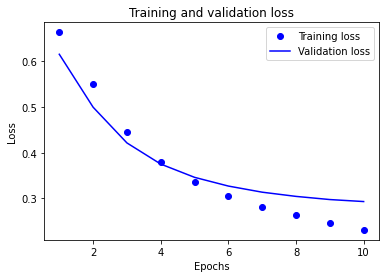

In [ ]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

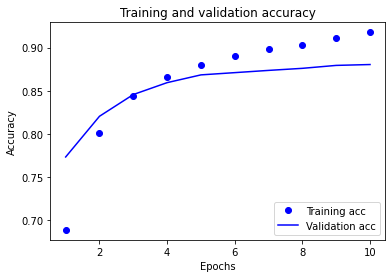

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer, model, layers.Activation('sigmoid')])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 9s 12ms/step - loss: 0.3355 - accuracy: 0.8676
0.8676400184631348


1/1 [==============================] - 0s 53ms/step


array([[0.61996025],
       [0.36855316],
       [0.26712266],
       [0.6025197 ],
       [0.51287335],
       [0.32449454],
       [0.16736317],
       [0.5140532 ],
       [0.7153663 ],
       [0.56934226]], dtype=float32)